In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('spam.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [9]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [12]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [13]:
ham=ham.sample(spam.shape[0])

In [14]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [15]:
data=ham.append(spam,ignore_index=True)
data.shape

(1494, 4)

In [ ]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

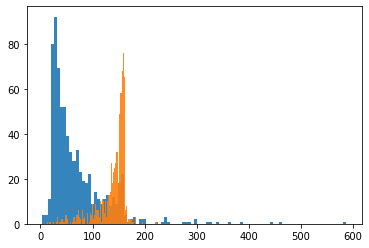

In [ ]:
plt.hist(data[data['label'] =='ham']['length'],bins=100,alpha =0.9)
plt.hist(data[data['label'] =='spam']['length'],bins=100,alpha =0.9)
plt.show()

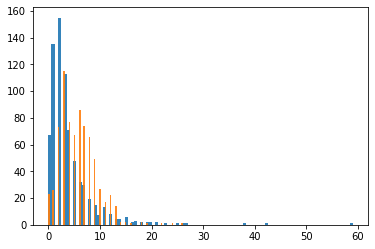

In [ ]:
plt.hist(data[data['label'] =='ham']['punct'],bins=100,alpha =0.9)
plt.hist(data[data['label'] =='spam']['punct'],bins=100,alpha =0.9)
plt.show()

In [ ]:
data

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [ ]:
1494*0.3

448.2

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1045,), (449,), (1045,), (449,))

Using Randomforest model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
classifier=Pipeline([("tfidf",TfidfVectorizer()) ,("classifier",RandomForestClassifier(n_estimators=100))])

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred=classifier.predict(X_test)
y_test,y_pred

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9487750556792873

In [ ]:
confusion_matrix(y_test,y_pred)

array([[227,   0],
       [ 23, 199]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       1.00      0.90      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



using svm model

In [ ]:
from sklearn.svm import SVC
svm=Pipeline([("tfidf",TfidfVectorizer()) ,("classifier",SVC(C=100,gamma='auto'))])


In [ ]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [ ]:
y_pred=svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9487750556792873

In [ ]:
confusion_matrix(y_test,y_pred)

array([[221,   6],
       [ 17, 205]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.97      0.95       227
        spam       0.97      0.92      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [ ]:
test1=['Hello,how are you?']
test2=['congratulations,you won a lottery to claim call on 4344']

In [ ]:
print(classifier.predict(test1))
print(classifier.predict(test2))

['ham']
['spam']
